In [ ]:
# https://www.kaggle.com/datasets/karnikakapoor/digits

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

## Set constants

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 32
CHANNELS=3
EPOCHS=10

## Import data into tensorflow dataset object

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Digits",
    seed=123,
    color_mode='grayscale',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=None
    
)


Found 10160 files belonging to 10 classes.


In [4]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Digits",
    seed=123,
    validation_split=0.2,
    subset="training",
    color_mode='grayscale',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=None
    
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Digits",
    seed=123,
    validation_split=0.2,
    subset="validation",
    color_mode='grayscale',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=None
    
)


Found 10160 files belonging to 10 classes.
Using 8128 files for training.
Found 10160 files belonging to 10 classes.
Using 2032 files for validation.


In [5]:
class_names = training_dataset.class_names
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
class_names = validation_dataset.class_names
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [7]:
X_train=[]
X_train_flatten=[]
y_train=[]
for image_batch, labels_batch in training_dataset:
    X_train.append(image_batch.numpy().reshape(IMAGE_SIZE, IMAGE_SIZE))
    X_train_flatten.append(image_batch.numpy().reshape(IMAGE_SIZE, IMAGE_SIZE).flatten())
    y_train.append(labels_batch.numpy())
X_train= np.array(X_train)
y_train= np.array(y_train)

In [8]:
X_test=[]
X_test_flatten=[]
y_test=[]
for image_batch, labels_batch in validation_dataset:
    X_test.append(image_batch.numpy().reshape(IMAGE_SIZE, IMAGE_SIZE))
    X_test_flatten.append(image_batch.numpy().reshape(IMAGE_SIZE, IMAGE_SIZE).flatten())
    y_test.append(labels_batch.numpy())
X_test= np.array(X_test)
y_test= np.array(y_test)

In [9]:
X_train.shape, X_test.shape

((8128, 32, 32), (2032, 32, 32))

In [10]:
X_train_flatten= np.array(X_train_flatten)
X_test_flatten= np.array(X_test_flatten)

In [11]:
X_train_flatten.shape ,X_test_flatten.shape

((8128, 1024), (2032, 1024))

In [12]:
# Scaling
X_train_flatten = X_train_flatten / 255
X_test_flatten = X_test_flatten / 255

In [13]:
# kera model build

tf_model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(IMAGE_SIZE*IMAGE_SIZE,), activation='sigmoid')
])

tf_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tf_model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
254/254 [==============================] - 1s 1ms/step - loss: 0.8956 - accuracy: 0.7790
Epoch 2/5
254/254 [==============================] - 0s 1ms/step - loss: 0.3646 - accuracy: 0.9124
Epoch 3/5
254/254 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.9215
Epoch 4/5
254/254 [==============================] - 0s 1ms/step - loss: 0.2426 - accuracy: 0.9337
Epoch 5/5
254/254 [==============================] - 0s 1ms/step - loss: 0.2095 - accuracy: 0.9432


In [17]:
# evaluate model

tf_model.evaluate(X_test_flatten, y_test)

64/64 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.9380


[0.2244388312101364, 0.9379921555519104]

In [19]:
y_predicted = tf_model.predict(X_test_flatten)
y_predicted[0]

64/64 [==============================] - 0s 862us/step


array([0.009586  , 0.90571725, 0.2385535 , 0.05679846, 0.18087143,
       0.08468521, 0.01942252, 0.3036323 , 0.01541028, 0.03853916],
      dtype=float32)

(3, <matplotlib.image.AxesImage at 0x2331bd975e0>)

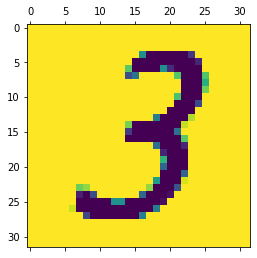

In [27]:
no_= 109
np.argmax(y_predicted[no_]), plt.matshow(X_test[no_])

In [28]:
# Confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[176,   0,   3,   0,   5,   2,   8,   0,   2,   0],
       [  0, 197,   4,   2,   0,   4,   0,   2,   1,   0],
       [  0,   1, 195,   2,   0,   1,   0,   1,   2,   0],
       [  2,   4,   2, 197,   0,   5,   0,   1,   1,   0],
       [  0,   6,   0,   0, 203,   0,   0,   0,   0,   2],
       [  0,   3,   1,   2,   2, 178,   4,   0,   0,   0],
       [  1,   0,   0,   1,   2,   1, 189,   0,   1,   0],
       [  0,   1,   4,   2,   2,   0,   0, 206,   4,   0],
       [  1,   3,   1,   3,   1,   1,   5,   0, 196,   1],
       [  3,   0,   1,   3,   1,   3,   2,   0,   3, 169]])>

Text(69.0, 0.5, 'Actual')

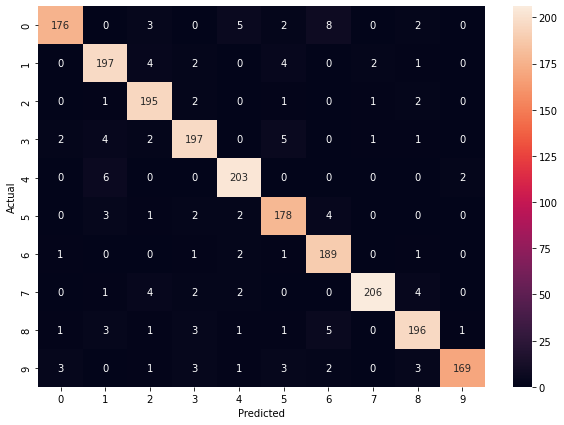

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Using hidden layers & flattening the input inside the sequence

In [32]:
# Scaling
X_train = X_train / 255
X_test = X_test/ 255

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMAGE_SIZE, IMAGE_SIZE)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
254/254 [==============================] - 2s 4ms/step - loss: 0.7247 - accuracy: 0.8018
Epoch 2/10
254/254 [==============================] - 1s 5ms/step - loss: 0.2888 - accuracy: 0.9181
Epoch 3/10
254/254 [==============================] - 1s 4ms/step - loss: 0.2160 - accuracy: 0.9352
Epoch 4/10
254/254 [==============================] - 1s 4ms/step - loss: 0.1965 - accuracy: 0.9401
Epoch 5/10
254/254 [==============================] - 1s 4ms/step - loss: 0.1688 - accuracy: 0.9488
Epoch 6/10
254/254 [==============================] - 1s 4ms/step - loss: 0.1428 - accuracy: 0.9560
Epoch 7/10
254/254 [==============================] - 1s 4ms/step - loss: 0.1331 - accuracy: 0.9587
Epoch 8/10
254/254 [==============================] - 1s 4ms/step - loss: 0.1259 - accuracy: 0.9617
Epoch 9/10
254/254 [==============================] - 1s 5ms/step - loss: 0.1234 - accuracy: 0.9631
Epoch 10/10
254/254 [==============================] - 1s 4ms/step - loss: 0.1093 - accuracy: 0.9659

In [37]:
# evaluate model

model.evaluate(X_test, y_test)

64/64 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 0.9592


[0.13966894149780273, 0.9591535329818726]

In [39]:
y_predicted = model.predict(X_test)
y_predicted[0]

64/64 [==============================] - 0s 3ms/step


array([0.01065173, 0.99983275, 0.72412497, 0.28521985, 0.47964364,
       0.46621996, 0.00124638, 0.9709624 , 0.05621742, 0.9105049 ],
      dtype=float32)

(1, <matplotlib.image.AxesImage at 0x23319b50a30>)

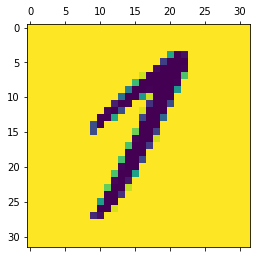

In [40]:
no_= 0
np.argmax(y_predicted[no_]), plt.matshow(X_test[no_])

Text(69.0, 0.5, 'Actual')

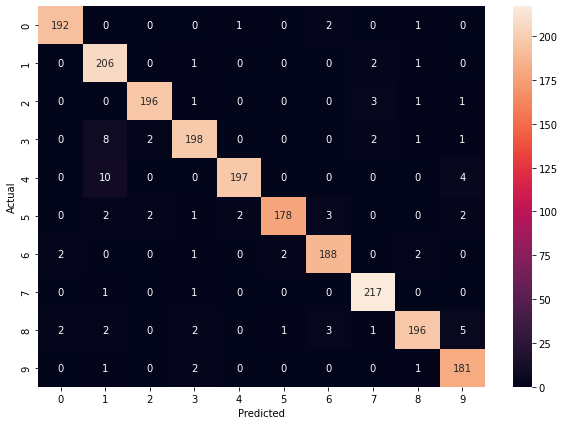

In [41]:
# Confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [42]:
# save model
filename= 'digit_train.h5'
model.save(filename)

In [44]:
# load model
from tensorflow.keras.models import load_model

In [45]:
loaded_model= load_model(filename)

In [70]:
X_test

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [46]:
loaded_model.predict(X_test)

64/64 [==============================] - 0s 3ms/step


array([[1.0651733e-02, 9.9983275e-01, 7.2412497e-01, ..., 9.7096241e-01,
        5.6217421e-02, 9.1050488e-01],
       [9.9026513e-01, 1.6486761e-03, 1.2616334e-04, ..., 5.8305392e-05,
        9.9847865e-01, 8.3723295e-01],
       [9.9982584e-01, 2.2652290e-04, 8.1796972e-03, ..., 1.8664815e-04,
        9.5999765e-01, 9.8476952e-01],
       ...,
       [6.6758561e-01, 9.9600405e-01, 9.9998832e-01, ..., 7.9643112e-01,
        1.4145936e-02, 1.5561951e-02],
       [9.8362511e-01, 6.3058594e-04, 1.0650958e-01, ..., 1.4570227e-01,
        2.6120711e-02, 9.9473119e-01],
       [9.9999702e-01, 2.0766785e-05, 1.6329136e-01, ..., 5.1509263e-04,
        3.5737476e-01, 8.9175981e-01]], dtype=float32)

## Check on Test data

In [60]:
import glob
all_files= glob.glob("Test/*")
all_files

['Test\\img001-00013.png',
 'Test\\img001-00014.png',
 'Test\\img001-00015.png',
 'Test\\img001-00016.png',
 'Test\\img001-00017.png',
 'Test\\img001-00018.png',
 'Test\\img005-00013.png',
 'Test\\img005-00014.png',
 'Test\\img005-00015.png',
 'Test\\img005-00016.png',
 'Test\\img007-00013.png',
 'Test\\img007-00014.png',
 'Test\\img007-00015.png',
 'Test\\img007-00016.png',
 'Test\\img007-00017.png']

In [74]:
X_unseen=[]
for i_ in all_files:
    image=  tf.keras.preprocessing.image.load_img(
        path= i_,
        color_mode='grayscale',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        )
    
    image_arr= tf.keras.preprocessing.image.img_to_array(image).reshape(IMAGE_SIZE, IMAGE_SIZE)
    X_unseen.append(image_arr)

X_unseen= np.array(X_unseen)

In [75]:
X_unseen[0]

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

In [76]:
X_unseen.shape

(15, 32, 32)

In [77]:
# Scaling
X_unseen = X_unseen / 255

In [78]:
loaded_model.predict(X_unseen)

1/1 [==============================] - 0s 60ms/step


array([[9.99993563e-01, 4.17426163e-05, 9.56998587e-01, 7.12460637e-01,
        8.95485937e-05, 6.99553918e-03, 3.13248187e-01, 5.94184659e-02,
        3.94979924e-01, 5.36508143e-01],
       [9.99994457e-01, 2.94140295e-06, 9.92013812e-01, 7.59422779e-01,
        2.68883014e-06, 8.37568310e-04, 2.46744268e-02, 8.34663361e-02,
        1.50838062e-01, 7.68828154e-01],
       [9.99814272e-01, 5.02490206e-04, 2.44347334e-01, 7.01366305e-01,
        1.57201939e-05, 3.51175636e-01, 5.55141449e-01, 3.19551565e-02,
        7.86279976e-01, 9.46988344e-01],
       [9.99993145e-01, 1.33017957e-05, 1.76968992e-01, 6.22497022e-01,
        2.14386250e-06, 5.88191867e-01, 7.52191603e-01, 6.85196277e-03,
        7.01438665e-01, 9.57681894e-01],
       [9.99953270e-01, 3.12334705e-05, 2.72710800e-01, 1.02544636e-01,
        1.14225134e-01, 5.84297068e-02, 9.11815166e-01, 4.69001103e-03,
        6.60979092e-01, 8.52345109e-01],
       [9.99939561e-01, 3.62921992e-06, 3.12060267e-02, 1.46531994e-02,
   

In [63]:
image=  tf.keras.preprocessing.image.load_img(
    path= all_files[7],
    color_mode='grayscale',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
 
 )

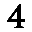

In [64]:
image

In [66]:
image= tf.keras.preprocessing.image.img_to_array(image).reshape(IMAGE_SIZE, IMAGE_SIZE)
image

#X_test.append(image_batch.numpy().reshape(IMAGE_SIZE, IMAGE_SIZE))

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

In [ ]:
np.array(X_train).shape

In [ ]:
image_batch.numpy().reshape(IMAGE_SIZE, IMAGE_SIZE).flatten()

In [ ]:
training_dataset

In [ ]:
X_train=[]
y_train=[]
for i_ in range(len(training_dataset)):
    for image_batch, labels_batch in training_dataset:
        X_train.append(image_batch[i_].numpy())
        y_train.append(int(class_names[labels_batch]))
        
    
    

In [ ]:
X_test=[]
y_test=[]
for i_ in range(len(validation_dataset)):
    for image_batch, labels_batch in validation_dataset:
        X_test.append(image_batch[i_].numpy())
        y_test.append(int(class_names[labels_batch]))

In [ ]:
y_train

In [ ]:
for image_batch, labels_batch in dataset.take(2):
    print(class_names[labels_batch])

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    check= image_batch[0]
    print(image_batch[0].shape)
    print(class_names[labels_batch[0]])
    print(abc)

In [ ]:
check= check.numpy().astype("uint8").reshape(IMAGE_SIZE, IMAGE_SIZE)

In [ ]:
check

In [ ]:
for image_batch, labels_batch in dataset.take(1):

## Visualize some of the images from our dataset

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

## Train/validation/test split

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds), len(val_ds), len(test_ds)

## Cache, Shuffle, and Prefetch the Dataset

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)